# Gerchberg-Saxton Iterative Phase Retrieval Demo

In this notebook, we will demonstrate how to iteratively retrieve the phase of amplitude only images propagated between two different planes, one in the image plane, and the other in the Fourier plane.

First, we need to load the packages necessary to simulate our data.

In [1]:
using TestImages, Images, ImageView, FFTW

Next, we will define some Fourier transforms that correspond to the way we think of a physical Fourier transform (the DC is in the center and the transform obeys Parseval's theorem).

In [2]:
function nfft(x)
    return 1/√(length(x))*ifftshift(fft(fftshift(x)))
end

function nifft(x)
    return √(length(x))*ifftshift(ifft(fftshift(x)))
end
;

Now, we load a test image with amplitude and phase information and take its Fourier transform. We refer to this as the "object" because it refers to the object we wish to image.

In [31]:
objectAmplitude = testimage("cameraman")
objectAmplitude = convert(Array{Float64}, objectAmplitude) # necessary to convert an "image" format to raw numbers
objectAmplitude = Array(padarray(objectAmplitude, Fill(0,(256,256),(256,256)))) # pad the array to ensure oversampling

objectPhase = testimage("mandril_gray")
objectPhase = convert(Array{Float64}, objectPhase) # necessary to convert an "image" format to raw numbers
objectPhase = Array(padarray(objectPhase, Fill(0,(256,256),(256,256)))) # pad the array to ensure oversampling

object = objectAmplitude.*exp.(1im*2*π*objectPhase)

fourierObject = nfft(object)
fourierAmplitude = abs.(fourierObject)

#display(Gray.(objectAmplitude))
#display(Gray.(objectPhase))

imshow(Gray.(log.(abs.(object))))
imshow(Gray.(angle.(object)));

We now perform the Gerchberg-Saxton algorithm as follows:

0. The initial guesses for the image and Fourier planes are simply the measured amplitudes (no phase information).
1. The object guess is Fourier transformed.
2. The resulting amplitude is replaced by the measured Fourier amplitude to form the new Fourier guess.
3. This new Fourier guess is inverse Fourier transformed.
4. The resulting amplitude is replaced by the measured object amplitude to form the new guess.
5. Steps 1-4 are repeated until convergance.



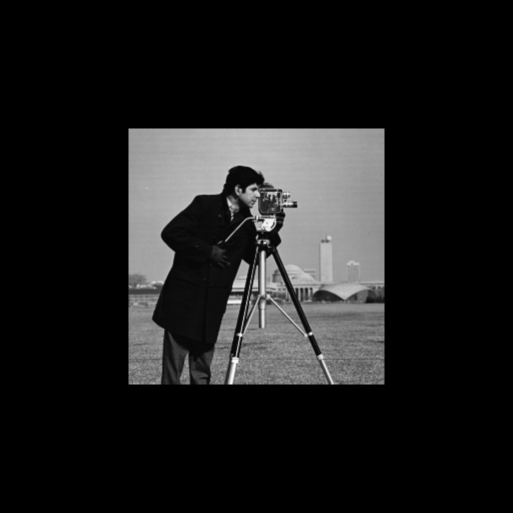

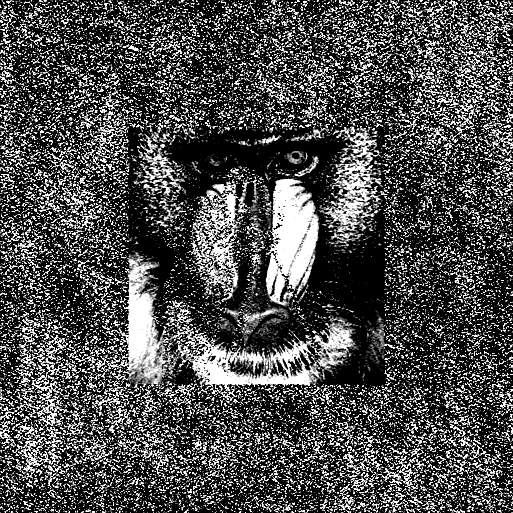

In [39]:
# 0. establish the initial object and fourier plane guesses
objectGuess = copy(objectAmplitude)
fourierGuess = copy(fourierAmplitude)

for i = 1:100
    # 1. take the fourier transform of the objet guess
    fourierGuess = nfft(objectGuess)

    # 2. replace the amplitude of the guess with the measured Fourier amplitude to form the new Fourier guess
    fourierGuess = fourierAmplitude.*exp.(1im*angle.(fourierGuess))

    # 3. take the inverse fourier transform of the Fourier guess 
    objectGuess  = nifft(fourierGuess)

    # 4. replace the amplitude of the guess with the measured 
    objectGuess = objectAmplitude.*exp.(1im*angle.(objectGuess))
    
    IJulia.clear_output(true) # necessary to clear the last plot so that the visualization updates
    display(Gray.(abs.(objectGuess)))
    display(Gray.(angle.(objectGuess)))
end

In [40]:
angle.(objectGuess)

1024×1024 Array{Float64,2}:
 -0.0      -0.0      -0.0       3.14159  …   3.14159  -3.14159  -3.14159
 -0.0      -0.0      -0.0       3.14159     -0.0       3.14159  -0.0    
 -3.14159  -3.14159  -3.14159  -0.0         -3.14159   3.14159  -3.14159
 -3.14159  -3.14159  -0.0       0.0         -0.0       3.14159   3.14159
 -3.14159  -3.14159   0.0       0.0         -0.0      -0.0      -0.0    
  0.0       0.0       0.0       0.0      …   0.0      -0.0      -0.0    
  0.0      -0.0      -0.0      -0.0          0.0       0.0      -0.0    
  0.0      -3.14159  -3.14159  -3.14159      3.14159   0.0       0.0    
  3.14159  -3.14159  -3.14159  -3.14159     -3.14159  -0.0      -0.0    
  0.0      -0.0       0.0      -3.14159     -3.14159  -3.14159   3.14159
  3.14159  -0.0      -0.0      -3.14159  …  -3.14159  -3.14159  -3.14159
  3.14159   0.0      -3.14159  -3.14159      3.14159  -3.14159  -3.14159
  3.14159   3.14159   0.0       0.0          3.14159   3.14159   3.14159
  ⋮                    